In [1]:
from NNScratchLib.models.MultiClassModels import NeuralNetwork
from NNScratchLib.models.Layers import SequentialLayer

from NNScratchLib.functions import activation_functions
from NNScratchLib.functions import measure_functions
from NNScratchLib.functions import optimizers
from NNScratchLib.functions import generative_optimizers

from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix

import tensorflow as tf
from tensorflow.keras.datasets import mnist

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

## Red Neuronal Para Clasificar el Dataset de Iris

Definiremos una red neuronal de 4 entradas, con una capa oculta de 4 neuronas, y una capa de salida de 3 neuronas. La función de activación para la capa oculta será la sigmoide y para la de salida la función softmax. Como el backpropagation ya tiene en cuenta la función de activación en la última capa, no es necesario definirla su derivada.

### Definición de la red

In [2]:
nn = NeuralNetwork()
nn.set(SequentialLayer(4, 5, activation=activation_functions.sigmoid, 
                            activation_derivate=activation_functions.sigmoid_derivate))
nn.set(SequentialLayer(5, 3, activation=activation_functions.softmax,
                            activation_derivate=activation_functions.mse_derivate))

### Dataset de Iris

Cargamos el dataset IRIS, y dividimos el conjunto de datos en en train y test.

In [3]:
iris = pd.read_csv('NNScratchLib/datasets/iris')
iris = shuffle(iris)

X = iris.iloc[:, 0:4].values
y = iris.iloc[:, 4].values

enc = OneHotEncoder()
y = enc.fit_transform(y.reshape(-1,1)).toarray()

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### Entrenamiento de la red

A continuación, entrenamos el modelo con el conjunto de entrenamiento, y mostramos la evolución del error en cada iteración. Utilizaremos el optimizador del descenso del gradiente clásico, con una tasa de aprendizaje de 0.01

In [5]:
print("accuracy before training: ", measure_functions.accuracy(y_test, [nn.feedfoward(x) for x in X_test]))
(acc, loss) = optimizers.gradient_descent(nn, X_train, y_train, measure_functions.accuracy, epochs=300, learning_rate=0.01)

accuracy before training:  0.3333333333333333
epoch   0 - Loss 1.13721, Accuracy 0.37500
epoch  10 - Loss 0.99340, Accuracy 0.62500
epoch  20 - Loss 0.88113, Accuracy 0.62500
epoch  30 - Loss 0.80260, Accuracy 0.62500
epoch  40 - Loss 0.75603, Accuracy 0.62500
epoch  50 - Loss 0.72721, Accuracy 0.62500
epoch  60 - Loss 0.70763, Accuracy 0.62500
epoch  70 - Loss 0.69308, Accuracy 0.62500
epoch  80 - Loss 0.68134, Accuracy 0.62500
epoch  90 - Loss 0.67110, Accuracy 0.62500
epoch 100 - Loss 0.66143, Accuracy 0.62500
epoch 110 - Loss 0.65154, Accuracy 0.62500
epoch 120 - Loss 0.64065, Accuracy 0.66667
epoch 130 - Loss 0.62790, Accuracy 0.66667
epoch 140 - Loss 0.61250, Accuracy 0.75000
epoch 150 - Loss 0.59411, Accuracy 0.83333
epoch 160 - Loss 0.57331, Accuracy 0.87500
epoch 170 - Loss 0.55126, Accuracy 0.87500
epoch 180 - Loss 0.52914, Accuracy 0.87500
epoch 190 - Loss 0.50777, Accuracy 0.91667
epoch 200 - Loss 0.48765, Accuracy 0.91667
epoch 210 - Loss 0.46901, Accuracy 0.91667
epoch 22

In [6]:
Y_pred = [nn.feedfoward(x) for x in X_test]
print("Accuracy after training (on test): ", measure_functions.accuracy(y_test, Y_pred))

Accuracy after training (on test):  0.9333333333333333


Si representamos la matriz de confusión del modelo

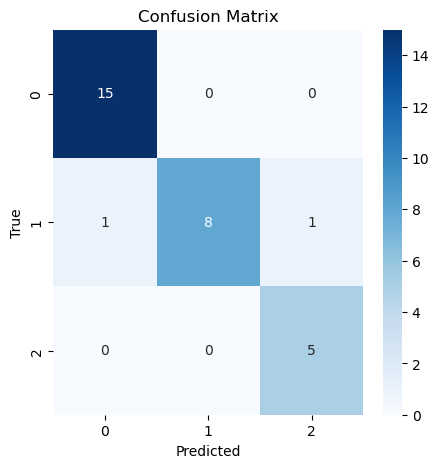

In [7]:
Y_pred = [np.argmax(nn.feedfoward(x)) for x in X_test]
Y_test = [np.argmax(y) for y in y_test]

cm = confusion_matrix(Y_test, Y_pred)
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

A continuación, repetiremos el proceso para clasificar el mismo dataset, esta vez con un modelo de mayor complejidad, con 3 capas ocultas y una de salida, con el objetivo de probar la capacidad de generalización del backpropagation.

In [14]:
nn = NeuralNetwork()
nn.set(SequentialLayer(4, 20, activation=activation_functions.sigmoid, 
                            activation_derivate=activation_functions.sigmoid_derivate))
nn.set(SequentialLayer(20, 10, activation=activation_functions.sigmoid, 
                            activation_derivate=activation_functions.sigmoid_derivate))
nn.set(SequentialLayer(10, 6, activation=activation_functions.sigmoid, 
                            activation_derivate=activation_functions.sigmoid_derivate))
nn.set(SequentialLayer(6, 3, activation=activation_functions.softmax,
                            activation_derivate=activation_functions.softmax_derivate))

In [15]:
print("accuracy before training: ", measure_functions.accuracy(y_test, [nn.feedfoward(x) for x in X_test]))
(acc, loss) = optimizers.gradient_descent(nn, X_train, y_train, measure_functions.accuracy, epochs=100, learning_rate=0.01)

accuracy before training:  0.3333333333333333
epoch   0 - Loss 3.04443, Accuracy 0.58333
epoch  10 - Loss 0.64160, Accuracy 0.66667
epoch  20 - Loss 0.52756, Accuracy 0.87500
epoch  30 - Loss 0.39850, Accuracy 0.95833
epoch  40 - Loss 0.29344, Accuracy 1.00000
epoch  50 - Loss 0.21887, Accuracy 1.00000
epoch  60 - Loss 0.17146, Accuracy 1.00000
epoch  70 - Loss 0.14322, Accuracy 1.00000
epoch  80 - Loss 0.12736, Accuracy 1.00000
epoch  90 - Loss 0.11924, Accuracy 1.00000


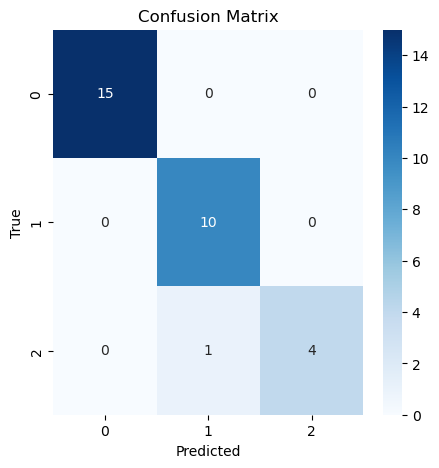

In [16]:
Y_pred = [np.argmax(nn.feedfoward(x)) for x in X_test]
Y_test = [np.argmax(y) for y in y_test]

cm = confusion_matrix(Y_test, Y_pred)
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Red Neuronal Para Clasificar el Dataset de MNIST

### Definimos la red

Definimos ahora una red neuronal de 748 entradas, correspondiente con el tamaño de las imágenes del dataset MNIST una vez aplicado un flatten sobre ellas. La red dispondrá de una capa oculta de 10 neuronas, y una capa de salida de también 10 neuronas. La función de activación para la capa oculta será la ReLU, aunque para el paper se utilizó la función sigmoide, y para la de salida la función softmax.

In [24]:
nn = NeuralNetwork()
nn.set(SequentialLayer(784, 10, activation=activation_functions.ReLU,
                                activation_derivate=activation_functions.ReLU_derivate))
nn.set(SequentialLayer(10, 10, activation=activation_functions.softmax, 
                                activation_derivate=activation_functions.softmax_derivate))

### Dataset de MNIST

Cargamos el dataset haciendo uso de la libería Keras, y dividimos el conjunto de datos en en train y test.

In [25]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [26]:
x_train = x_train.reshape((-1, 28*28))
x_train = x_train.astype('float64')/255

x_test = x_test.reshape((-1, 28*28))
x_test = x_test.astype('float64')/255

y_train = enc.fit_transform(y_train.reshape(-1,1)).toarray()
y_test = enc.fit_transform(y_test.reshape(-1,1)).toarray()

### Entrenamiento de la red

In [27]:
print("accuracy before training: ", measure_functions.accuracy(y_test, [nn.feedfoward(x) for x in x_test]))
optimizers.Adam(nn, x_train, y_train, measure_functions.accuracy, epochs=80, learning_rate=0.001);

accuracy before training:  0.0912
epoch   0 - Loss 1.70404, Accuracy 0.47708
epoch  10 - Loss 0.17571, Accuracy 0.85167
epoch  20 - Loss 0.71546, Accuracy 0.89617
epoch  30 - Loss 1.89618, Accuracy 0.91458
epoch  40 - Loss 0.25085, Accuracy 0.92350
epoch  50 - Loss 0.05822, Accuracy 0.92650
epoch  60 - Loss 0.02447, Accuracy 0.92817
epoch  70 - Loss 0.02460, Accuracy 0.92867


In [28]:
Y_pred = [nn.feedfoward(x) for x in x_test]
print("Accuracy after training (on test): ", measure_functions.accuracy(y_test, Y_pred))

Accuracy after training (on test):  0.9255


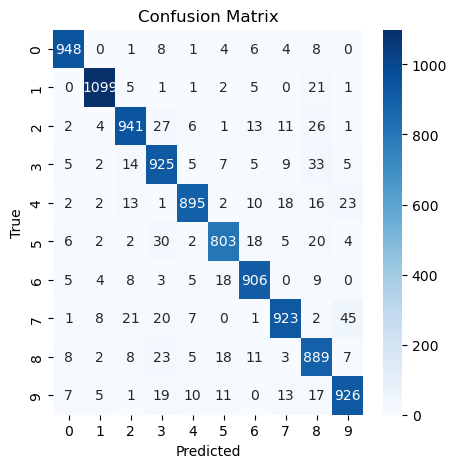

In [29]:
Y_pred = [np.argmax(nn.feedfoward(x)) for x in x_test]
Y_test = [np.argmax(y) for y in y_test]

cm = confusion_matrix(Y_test, Y_pred)
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Autoencoder para la reconstrucción de imágenes MNIST

A continuación, definiremos un autoencoder, que es una red neuronal que tiene como objetivo aprender a reconstruir la entrada en la salida. Para ello, definiremos una red neuronal de 784 entradas, correspondiente con el tamaño de las imágenes del dataset MNIST una vez aplicado un flatten sobre ellas. La red dispondrá de dos capas ocultas, ocupándose la primera de reducir la dimensionalidad de la entrada a la del espacio latente, y la segunda de reconstruir la entrada a partir del espacio latente, junto con la capa de salida. La función de activación para las distintas capas será la función sigmoide.

In [30]:
Autoencoder = NeuralNetwork()
Autoencoder.set(SequentialLayer(784, 128, activation=activation_functions.sigmoid,
                                activation_derivate=activation_functions.sigmoid_derivate))
Autoencoder.set(SequentialLayer(128, 9, activation=activation_functions.sigmoid,
                                activation_derivate=activation_functions.sigmoid_derivate))
Autoencoder.set(SequentialLayer(9, 128, activation=activation_functions.sigmoid,
                                activation_derivate=activation_functions.sigmoid_derivate))
Autoencoder.set(SequentialLayer(128, 784, activation=activation_functions.sigmoid,
                                activation_derivate=activation_functions.mse_derivate))

Hemos de tener en cuenta que la derivada de la función de activación de la capa de salida es realmente la derivada del error MSE, excelente para este tipo de problemas generativos, en base a una función de activación sigmoide, esto es:

$$\frac{\partial E}{\partial y} = \frac{\partial E}{\partial \hat{y}} \frac{\partial \hat{y}}{\partial y} = \frac{2}{m}(\hat{y} - y) \hat{y} (1 - \hat{y})$$


Una vez comprendido esto, cargamos el dataset MNIST, y dividimos el conjunto de datos en en train y test.

In [31]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train[:10000].reshape((-1, 28*28))
x_train = x_train.astype('float64')/255

x_test = x_test.reshape((-1, 28*28))
x_test = x_test.astype('float64')/255

Para entrenar, seguimos la misma metodología que en el caso anterior, pero esta vez, en lugar de utilizar el descenso del gradiente clásico, utilizaremos una versión adaptada la cual no realiza el cálculo del accuracy, pues no tiene sentido para modelos generativos.

In [32]:
generative_optimizers.gradient_descent_autoenc(Autoencoder, 
                                               x_train, 
                                               x_train, 
                                               epochs=200, 
                                               learning_rate=0.01);

epoch   0 - Loss 0.20307
epoch  10 - Loss 0.16052
epoch  20 - Loss 0.17367
epoch  30 - Loss 0.18167
epoch  40 - Loss 0.19060
epoch  50 - Loss 0.18942
epoch  60 - Loss 0.19051
epoch  70 - Loss 0.18928
epoch  80 - Loss 0.19079
epoch  90 - Loss 0.19598
epoch 100 - Loss 0.20049
epoch 110 - Loss 0.19847
epoch 120 - Loss 0.19932
epoch 130 - Loss 0.20280
epoch 140 - Loss 0.19882
epoch 150 - Loss 0.19681
epoch 160 - Loss 0.20153
epoch 170 - Loss 0.20438
epoch 180 - Loss 0.20134
epoch 190 - Loss 0.20285


En apenas la primera época, el modelo ya alcanza un error muy bajo, y se producen pequeñas oscilaciones en el error. No obstante, el modelo sigue aprendiendo pese que al error no disminuya, debido a la implementación correcta del backpropagation. La función de error MSE es una función muy influenciable por outliers o imágenes poco comunes, por lo que a medida que se entrena y se ajusta el modelo a las imágenes más frecuentes, este error se aumenta.

En la siguiente gráfica, se puede comprobar como el modelo es capaz de reconstruir imágenes de dígitos correctamente.

In [33]:
def print_images(init_pos, n, x_train, model, save=False, name=None):
    plt.figure(figsize=(19, 4))
    plt.gray()

    output = [model.feedfoward(x_train[i]).reshape(28, 28) for i in range(init_pos, init_pos + n)]
    
    for i, item in enumerate(x_train[init_pos:init_pos + n]):
        plt.subplot(2, n, i + 1)
        plt.title(f'Original')
        item = item.reshape(-1, 28, 28)
        plt.imshow(item[0])

    for i, item in enumerate(output):
        plt.subplot(2, n, n + i + 1)
        plt.title(f'Generated')
        item = item.reshape(-1, 28, 28)
        plt.imshow(item[0])

    plt.tight_layout()
    plt.subplots_adjust(hspace=0.5)
    if save == True and name != None: plt.savefig(f'images/{name}.png')
    plt.show()

Si comprobamos los resultados obtenidos, basta analizar los resultados para las imágenes de entrenamiento para ver que el modelo se ha entrenado correctamente

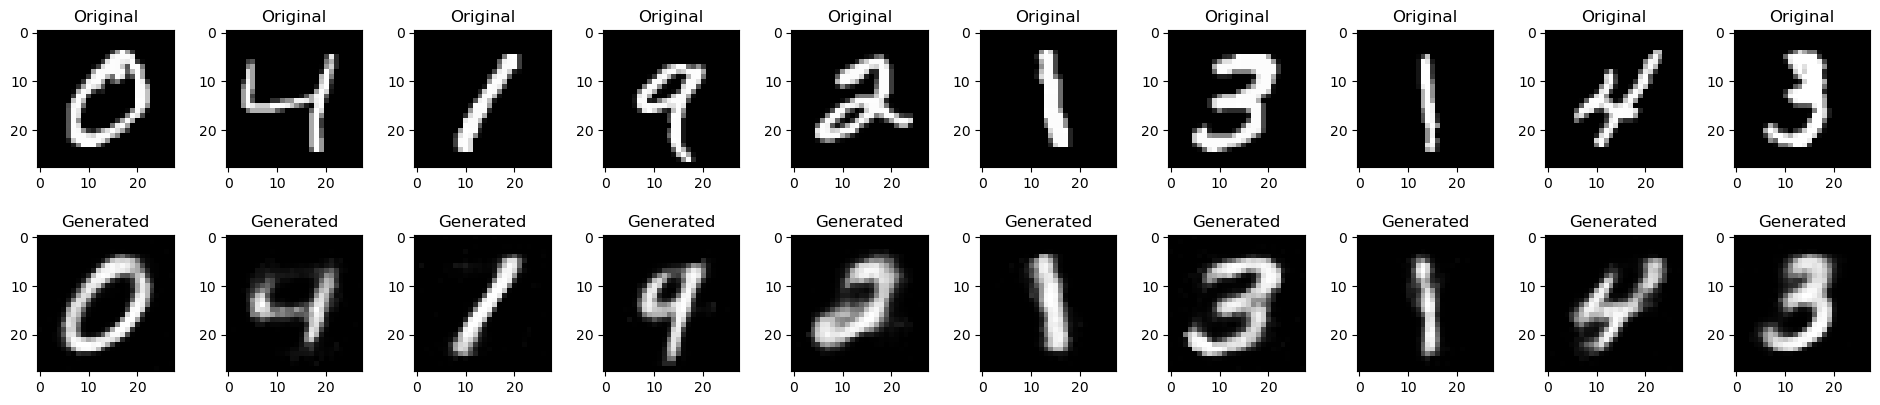

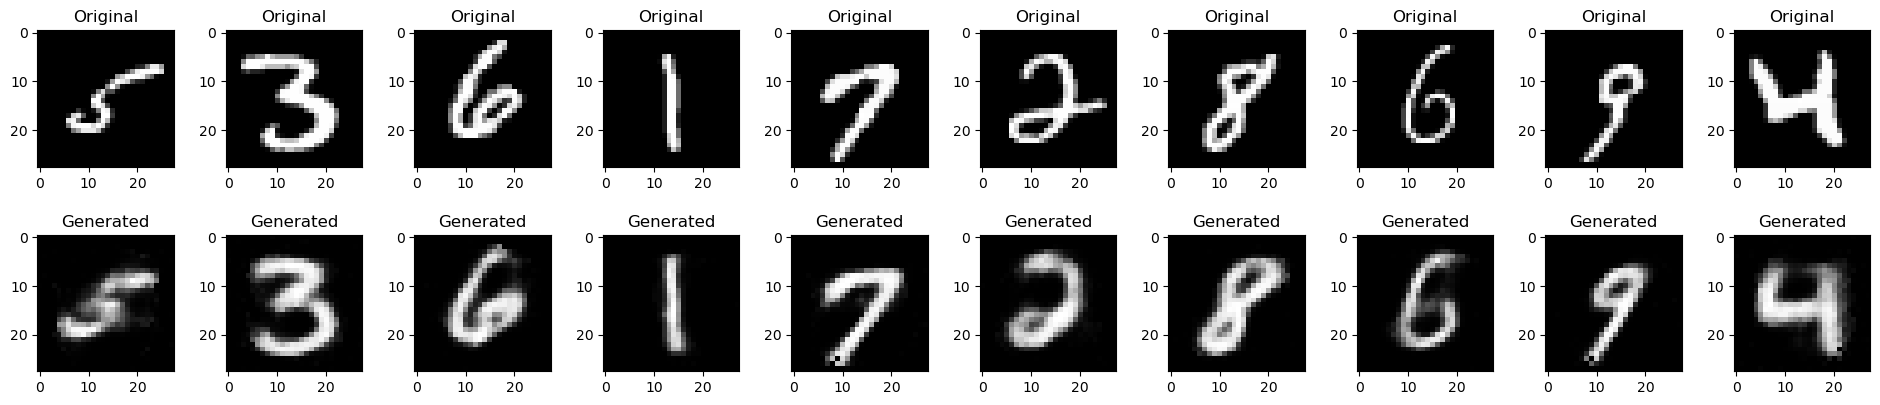

In [34]:
print_images(1, 10, x_train, Autoencoder)
print_images(11, 10, x_train, Autoencoder)

Para las imágenes de test, el modelo también se comporta correctamente, aunque se puede observar que el error es mayor, debido a que el modelo no ha sido entrenado con estas imágenes, y por tanto, no ha aprendido a reconstruirlas tan bien.

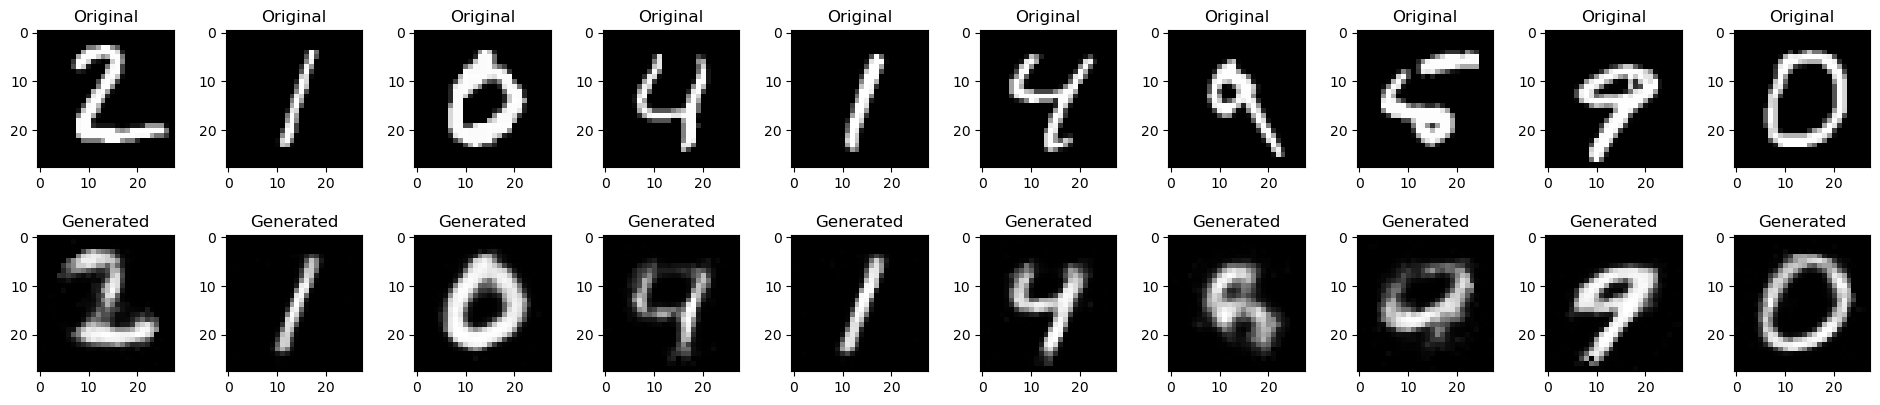

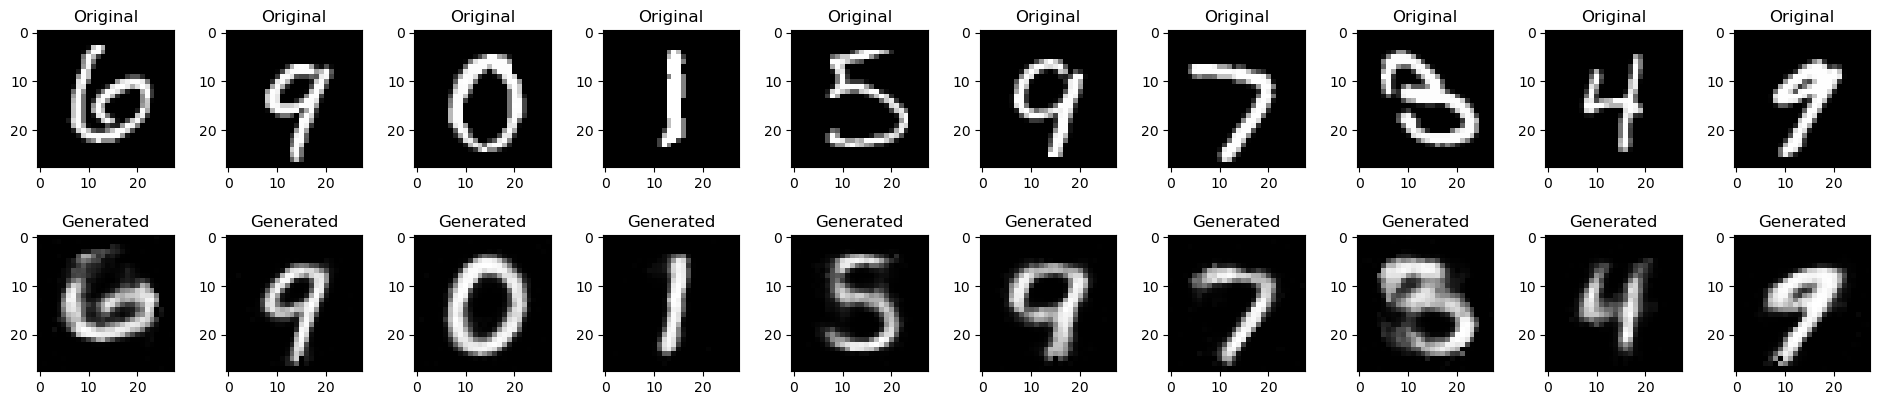

In [39]:
print_images(1, 10, x_test, Autoencoder)
print_images(11, 10, x_test, Autoencoder)

Estos resultado son bastante impresionantes, más aún si tenemos en cuenta su evolucion a lo largo de las épocas. La siguiente imagen, por ejemplo, muestra la reconstrucción de un conjunto de imágenes de validación en la época 20.

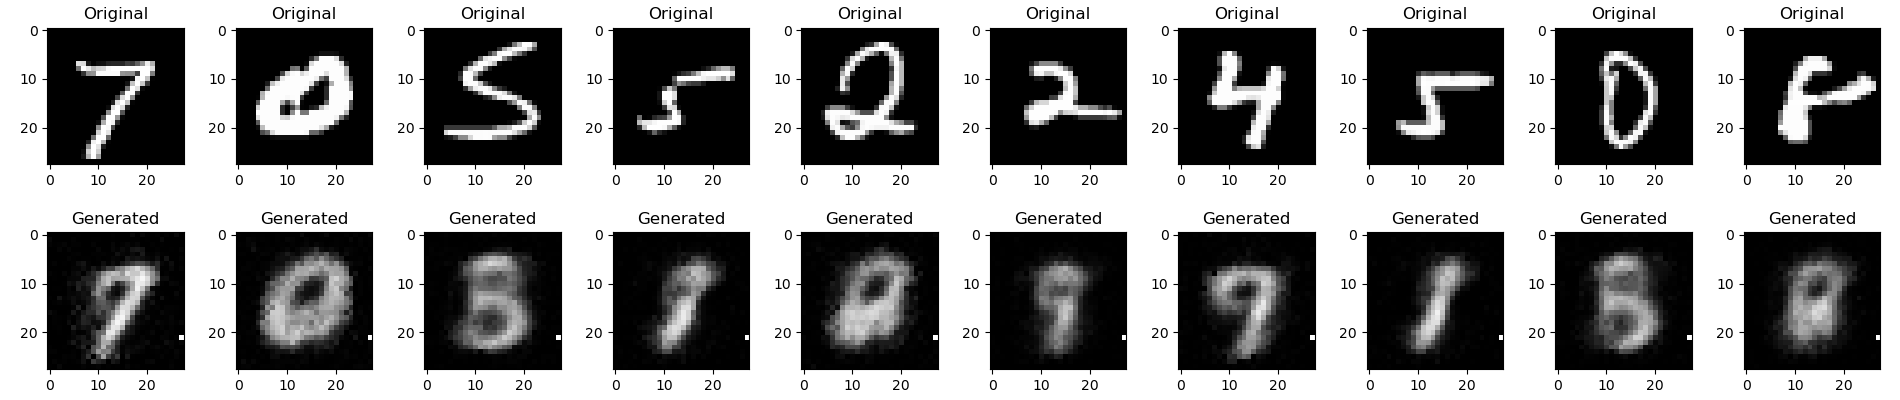

Terminado el entrenamiento y su validación, guardamos el modelo para su posterior uso.

In [38]:
Autoencoder.save('models/autoencoder')

# Autoencoder para la reducción de ruido en imágenes MNIST

A continuación, desarrollaremos un autoencoder similar, esta vez centrado en la reducción de ruido en la imagen. Para ello, añadiremos ruido a las imágenes de entrada, y entrenaremos la red para que sea capaz de eliminar el ruido de las imágenes de entrada.

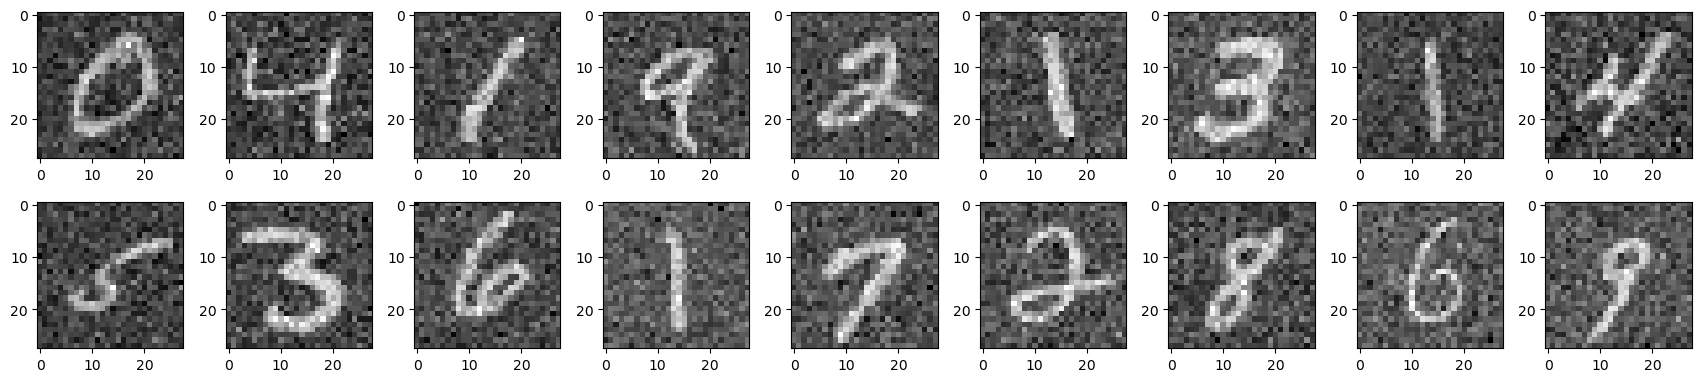

In [35]:
def gaussian_noise(x, mean=0, std=1):
    return x + np.random.normal(mean, std, x.shape)

noised_x_train = gaussian_noise(x_train, std=0.2)

plt.figure(figsize=(19, 4))
plt.gray()

for i, item in enumerate(noised_x_train[1:10]):
    plt.subplot(2, 10, i + 1)
    item = item.reshape(-1, 28, 28)
    plt.imshow(item[0])

for i, item in enumerate(noised_x_train[11:20]):
    plt.subplot(2, 10, 10 + i + 1)
    item = item.reshape(-1, 28, 28)
    plt.imshow(item[0])

plt.tight_layout()
plt.show()

Definiremos un modelo con la misma complejidad que el anterior, y nuevamente cargaremos el dataset MNIST, y dividimos el conjunto de datos en en train y test.

In [2]:
NoiseRedAutoencoder = NeuralNetwork()
NoiseRedAutoencoder.set(SequentialLayer(784, 128, activation=activation_functions.sigmoid,
                                activation_derivate=activation_functions.sigmoid_derivate))
NoiseRedAutoencoder.set(SequentialLayer(128, 9, activation=activation_functions.sigmoid,
                                activation_derivate=activation_functions.sigmoid_derivate))
NoiseRedAutoencoder.set(SequentialLayer(9, 128, activation=activation_functions.sigmoid,
                                activation_derivate=activation_functions.sigmoid_derivate))
NoiseRedAutoencoder.set(SequentialLayer(128, 784, activation=activation_functions.sigmoid,
                                activation_derivate=activation_functions.mse_derivate))

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train[:30000].reshape((-1, 28*28))
x_train = x_train.astype('float64')/255

x_test = x_test.reshape((-1, 28*28))
x_test = x_test.astype('float64')/255

Hecho esto, añadimos ruido a las imágenes de entrada, y entrenamos el modelo. En este caso, utilizaremos el descenso del gradiente clásico adaptado a modelos generativos. Además, le pasaremos como entrada al optimizador los datos correspondiente a las imágenes con ruido, y como salida las imágenes sin ruido, con el objetivo de que el modelo aprenda a eliminarlo de las imágenes.

In [4]:
noised_x_train = gaussian_noise(x_train, std=0.4)

In [5]:
generative_optimizers.gradient_descent_autoenc(NoiseRedAutoencoder,
                                                noised_x_train, x_train,
                                                epochs=250,
                                                learning_rate=0.01);

epoch   0 - Loss 0.16667
epoch  10 - Loss 0.14671
epoch  20 - Loss 0.14787
epoch  30 - Loss 0.15477
epoch  40 - Loss 0.16318
epoch  50 - Loss 0.17530
epoch  60 - Loss 0.18460
epoch  70 - Loss 0.19020
epoch  80 - Loss 0.19157
epoch  90 - Loss 0.19533
epoch 100 - Loss 0.18972
epoch 110 - Loss 0.19463
epoch 120 - Loss 0.18507
epoch 130 - Loss 0.19458
epoch 140 - Loss 0.19683
epoch 150 - Loss 0.20958
epoch 160 - Loss 0.19847
epoch 170 - Loss 0.20358
epoch 180 - Loss 0.20711
epoch 190 - Loss 0.19851
epoch 200 - Loss 0.20932
epoch 210 - Loss 0.21563
epoch 220 - Loss 0.21697
epoch 230 - Loss 0.20666
epoch 240 - Loss 0.21791


Si visualizamos los resultados obtenidos, podemos comprobar que el modelo es capaz de eliminar el ruido de las imágenes de entrada, incluso para un nivel de ruido bastante elevado.

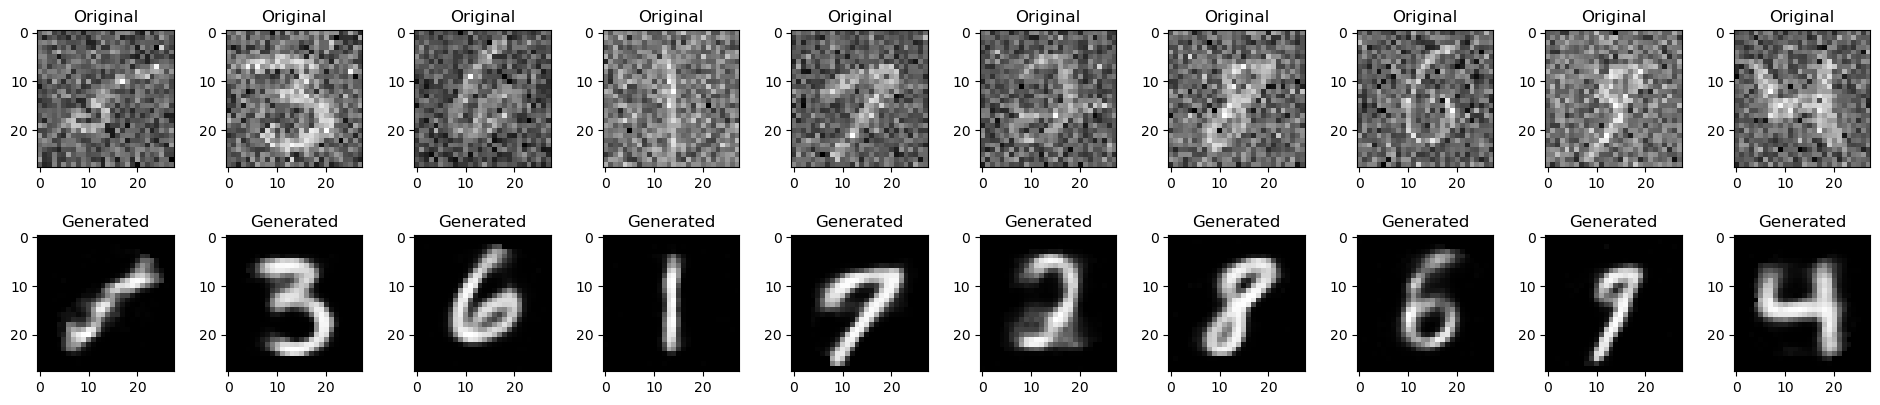

In [14]:
print_images(11, 10, noised_x_train, NoiseRedAutoencoder, 
             save=True, name='results/NoiseRedAutoencoder0.4std')

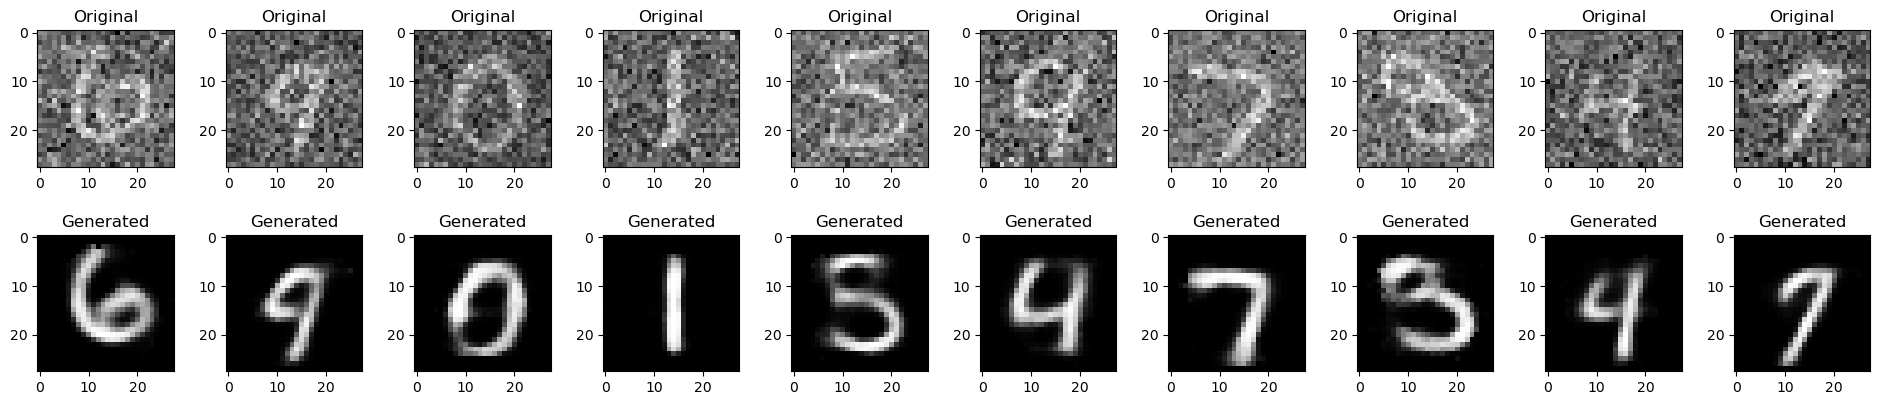

In [15]:
print_images(11, 10, gaussian_noise(x_test, std=0.4), NoiseRedAutoencoder,
            save=True, name='results/NoiseRedAutoencoder0.4std_test')

Como último paso, guardamos el modelo para su posterior uso.

In [10]:
NoiseRedAutoencoder.save('models/NoiseRedAutoencoder_0.4std')